In [2]:
#1
import numpy as np
a = np.random.random((10,3))
print(a,"\n\n\n\n",a[np.arange(9),abs((a-0.5)).argmin(axis=1)[np.arange(9)]])

[[0.31322484 0.55033661 0.32997472]
 [0.23802778 0.46158643 0.54381547]
 [0.89466273 0.37684245 0.01477767]
 [0.52345839 0.93021981 0.00144604]
 [0.33685547 0.3048894  0.9570414 ]
 [0.55860918 0.98154044 0.69357978]
 [0.07264785 0.16144876 0.12954681]
 [0.09491037 0.11436085 0.31223547]
 [0.84631188 0.66629643 0.18379668]
 [0.97149114 0.66031154 0.16218325]] 



 [0.55033661 0.46158643 0.37684245 0.52345839 0.33685547 0.55860918
 0.16144876 0.31223547 0.66629643]


In [3]:
#2
a = np.random.random((6,6))
print(a,"\n\n\n\n",a.sum(axis=1)/a.min(axis=0))

[[0.29725395 0.62288568 0.01462661 0.31687993 0.63079965 0.81801373]
 [0.24455909 0.52026814 0.31076443 0.60204789 0.58939925 0.64707072]
 [0.07835153 0.95731072 0.04102606 0.47666687 0.50646928 0.29251567]
 [0.24039931 0.21400247 0.57507872 0.79570185 0.75435554 0.02482607]
 [0.76792777 0.34593364 0.79491727 0.29861395 0.38201605 0.52884977]
 [0.73550999 0.03805505 0.69371489 0.32085167 0.46385238 0.51721013]] 



 [ 34.46594647  76.57615638 160.82603212   8.72150793   8.16263721
 111.54378217]


In [4]:
#3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(x[1:][(x==0)[:-1]].max())

5


In [5]:
#4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x += np.bincount(i, minlength=len(x))
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [8]:
#5
n = 4
a = np.arange(n*n).reshape(n, n)
print(a,"\n\n\n\n")
d = {k: a[np.indices((n,n))[0]+np.indices((n,n))[1]==k] for k in range(2*n-1)}
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 




{0: array([0]), 1: array([1, 4]), 2: array([2, 5, 8]), 3: array([ 3,  6,  9, 12]), 4: array([ 7, 10, 13]), 5: array([11, 14]), 6: array([15])}


[4 4 1 0 0 0 2 0 1 1 1 3 0 0 2 4 3 3 3 4 4 4 4 4 0]
3.7889384668432258


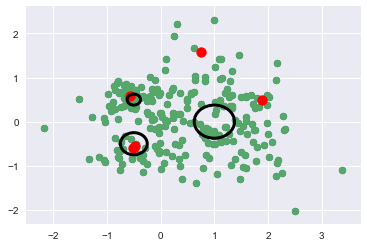

In [6]:
#6
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

initialize_centroids(points, 5)

plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

def kmeans(X, centroids, k, iter = 20, tresh = 1e-5, it = 0, dist = 0):
    y = np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)
    if (iter == it):
        print(y)
        print(dist)
        return
    c = centroids[y]
    #print(X-c)
    dist = np.linalg.norm(X-c)
    if (dist <= tresh):
        print(y)
        print(1)
        print(dist)
        return
    coun = np.bincount(y)
    for i in range(coun.size):
        if coun[i] != 0:
            p = np.sum(X[y == i], axis=0)/coun[i]
            centroids[i] = p
    kmeans(X, centroids, k, 20, tresh, it+1, dist)

X = np.repeat(centroids, 5, axis=0)
X = X + np.random.randn(*X.shape)
kmeans(X, centroids, 2, 1e-5, 0, 0)
